<a href="https://colab.research.google.com/github/annakopeikina/-annakopeikina-gEEKbRAIN_end-of-semestr_project/blob/main/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [6]:
from google.colab import files

# Загрузка файла с вашего компьютера
uploaded = files.upload()

Saving diabetes-dataset.csv to diabetes-dataset.csv


1. Предварительная обработка данных:  
— Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.  
— Разделите датасет на обучающую и тестовую выборки.  

In [7]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [10]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


  
 мы видим, что у 50% пациенток из выборки толщина кожной складки от 0 до 32 мм и уровень инсулина от 0 до 130. также,  параметры содержание глюкозы, ИМТ, давление (как заметили при просмотре таблицы) принимают значение 0, что невозможно. Эти нули однозначно исказят данные для модели. Проставить NaN мы не можем - модель не воспринимает NaN. Следует принять решение, что же делать с данными.

In [11]:
nulls = len(df[(df.BloodPressure == 0)]) + len(df[(df.Insulin == 0)]) + len(df[(df.SkinThickness == 0)]) + len(df[(df.Glucose == 0)]) + len(df[(df.BMI == 0)])
nulls

1660

Таких пропущенных значений в сумме довольно много, просто удалить мы их не можем. Это почти весь объем данных.

In [12]:
print(len(df[(df.Glucose == 0)]))
print(len(df[(df.BMI == 0)]))
print(len(df[(df.BloodPressure == 0)]))


13
28
90


Предалаю удалить строки, где мы встретили данные пропуски, так как их довольно мало.

In [13]:
df.drop(df[(df['Glucose'] == 0) | (df['BMI'] == 0) | (df['BloodPressure'] == 0)].index, inplace=True)

In [14]:
print(len(df[(df.SkinThickness == 0)]))
print(len(df[(df.Insulin == 0)]))

488
851


Столбец "толщина кожи" содержит примерно четверть пропусков. Предлагаю его заполнить средним значением. А, к сожалению, в столбце, отражающем содерджание инсулина в крови, пропусков - почти половина, если заполнить его средними значениями, мы совсем исказим зависимость, поэтому данный столбец, хоть он и показателен, придется удалить совсем.

In [15]:
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df = df.drop(['Insulin'], axis=1)

In [ ]:
len(df)

1888

In [16]:
duplicates = df.duplicated()
duplicates.sum()

1186

В таблице как будто бы есть дубли, однако теоретически данные могут и повторяться, у нас нет каких-то индивидуальных параметров.

<Axes: ylabel='Outcome'>

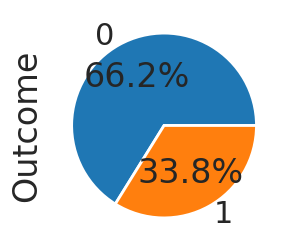

In [23]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [6,3]
df.groupby('Outcome').size().plot(kind='pie',
                                       y = "Outcome",
                                       label = "Outcome",
                                       autopct='%1.1f%%')

Целевая колонка - есть диабет или нет - находится в добольно выраженном дисбалансе.У 66 % испытуемых не обнаружили диабет, а у 34% - обнаружили.
Данную колонку я оцениваю как качественный признак, остальные - как количественные.

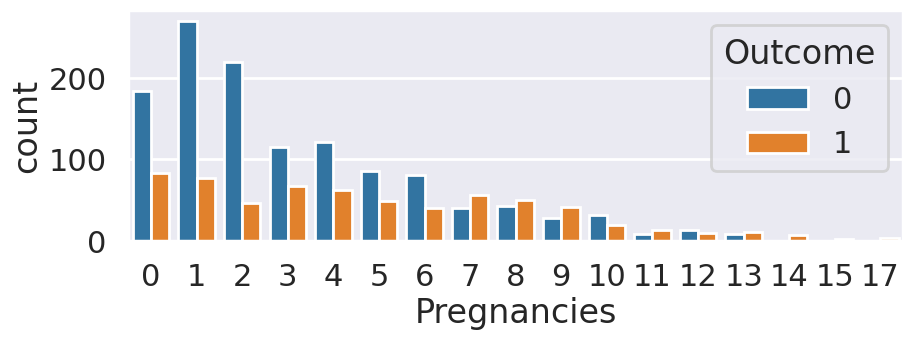

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(x='Pregnancies',hue='Outcome',data=df)
plt.show()

Имеющиеся данные не очень подходят для такой визуализации. Видно, что у женщин, у которых была 1 беременность, реже всего обнаруживали диабет. При этом чаще всего диабет обнаруживается у женщин (мы знаем, что в исследовании принимали участие только женщины), перенесших 0 или 1 беременность.

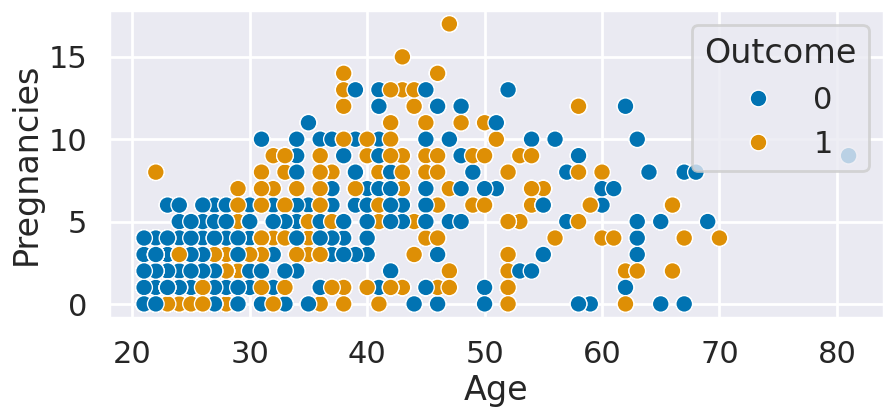

In [25]:
plt.figure(figsize=(10,4))
sns.scatterplot(data = df, x='Age', y = 'Pregnancies', hue='Outcome')
sns.set_palette("colorblind")
plt.show()

In [26]:
from scipy.stats import spearmanr
coef, p = spearmanr(df['Pregnancies'], df['Age'])
print(f"Коэффициент корреляции Спирмена между кол-вом беременностей и возрастом: {coef}, P-value: {p}")

Коэффициент корреляции Спирмена между кол-вом беременностей и возрастом: 0.6068347308907017, P-value: 2.488067131874704e-190


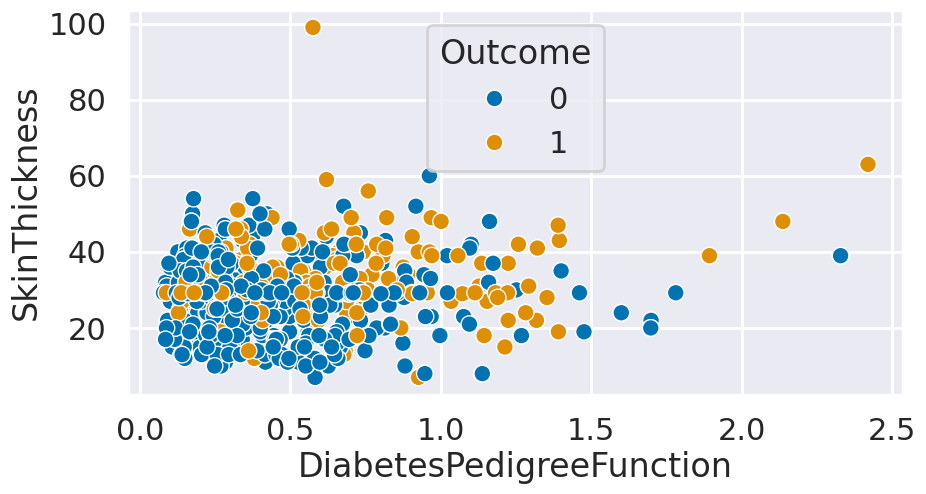

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x='DiabetesPedigreeFunction', y = 'SkinThickness', hue='Outcome')
plt.show()

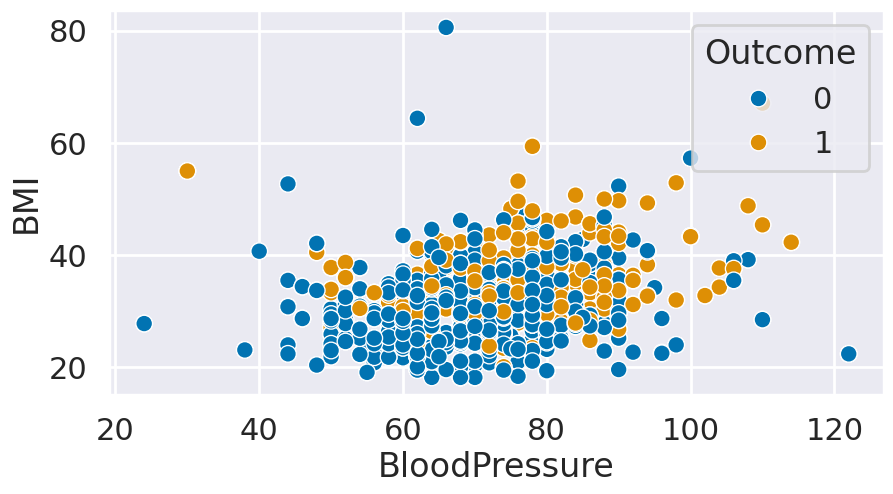

In [30]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x='BloodPressure', y = 'BMI', hue='Outcome')
plt.show()

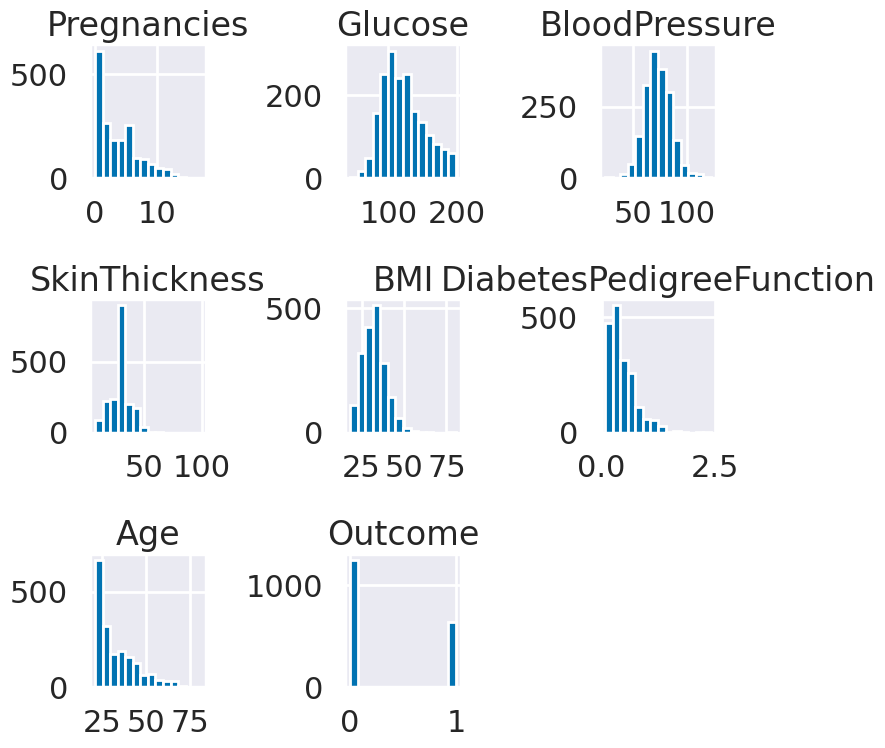

In [33]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df.hist(figsize=(8, 8), bins=14)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show()

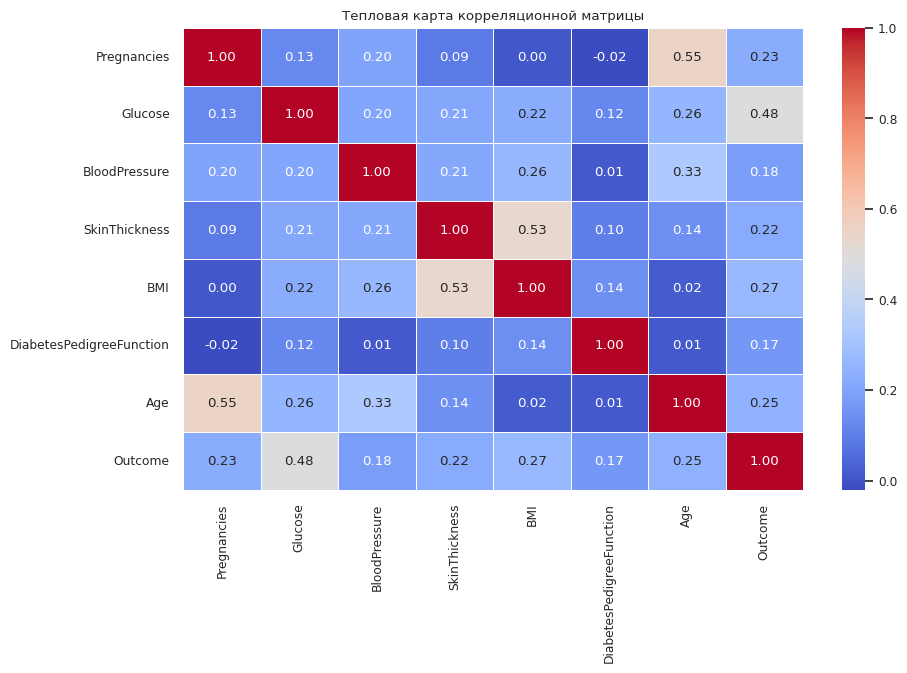

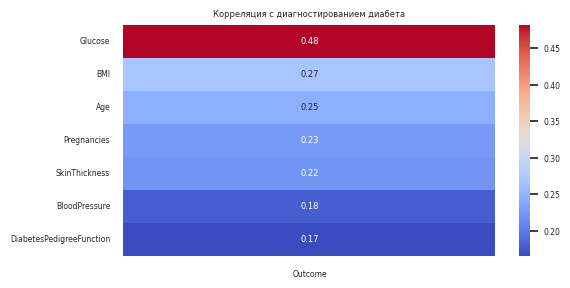

In [35]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.5)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с диагностированием диабета')
plt.show()

Из графиков видно, что на проявление диабета больше всего влияют такие параметры как: уровень глюкозы (по которому в большой степени и выставляется диагноз), ИМТ, возраст.  
Как мы видим на тепловой карте, кол-во беременностей зависит скорее от возраста, чем от чего-либо еще, поэтому занимает высокое место. Также толщина кожной складки скорее связана с ИМТ, тк является еще одним маркером при постановке диагноза "ожирение". Возможно, имеет смысл данные параметры не включать в модель, так как они дублируют друг друга по своей сути. На графике мы видели, что в целом как таковое то же количество беременностей ни о чем не говорит.

2. Построение модели:  
— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.  
— Обучите модель на обучающем наборе данных.  

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
X = df[['BMI', 'Glucose']]  # Выбираем признаки
y = df['Outcome']  # Целевая переменная

X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)

predictions = model1.predict(X_test1)
accuracy1 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy1)

Accuracy: 0.7142857142857143


In [39]:
X = df[['BMI', 'Glucose', 'Age']]
y = df['Outcome']

X_train, X_test2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train, y_train)

predictions = model2.predict(X_test2)
accuracy2 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy2)

Accuracy: 0.7301587301587301


In [41]:
X = df[['BMI', 'Glucose', 'Age', 'BloodPressure']]
y = df['Outcome']

X_train, X_test3, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model3 = LogisticRegression(class_weight='balanced')
model3.fit(X_train, y_train)

predictions = model3.predict(X_test3)
accuracy3 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy3)

Accuracy: 0.7301587301587301


In [43]:
X = df[['BMI', 'Glucose', 'Age', 'BloodPressure', 'SkinThickness', 'Pregnancies']]
y = df['Outcome']

X_train, X_test4, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model4 = LogisticRegression(class_weight='balanced')
model4.fit(X_train, y_train)

predictions = model4.predict(X_test4)
accuracy4 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy4)

Accuracy: 0.7380952380952381


Сначала с каждым добавленным параметром точность нашей модели росла, однако параметры 'BMI', 'Glucose', 'Age' кажутся ключевыми, добавление давления, толщины кожной складки и кол-ва беременностей не существенно улучшают точность. Возможно, толщина кожной складки и беременности зашумляют модель.

In [45]:
X = df.drop(["Outcome", "Pregnancies", 'SkinThickness'], axis=1)
y = df["Outcome"]
X_train, X_test5, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model5 = LogisticRegression(class_weight='balanced')
model5.fit(X_train, y_train)

predictions = model5.predict(X_test5)
accuracy5 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy5)

Accuracy: 0.7592592592592593


Действительно, без этих признаков, но с неким коэффициентом отображающим семейный анамнез модель стала более точной.

3. Оценка модели:  
— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    'Model 1': model1,
    'Model 2': model2,
    'Model 3': model3,
    'Model 4': model4,
    'Model 5': model5
}

test_datasets = {
    'Model 1': X_test1,
    'Model 2': X_test2,
    'Model 3': X_test3,
    'Model 4': X_test4,
    'Model 5': X_test5
}

results = []

for model_name, model in models.items():
    X_test = test_datasets[model_name]
    y_pred = model.predict(X_test)
    scores = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='binary'),
        recall_score(y_test, y_pred, average='binary'),
        f1_score(y_test, y_pred, average='binary')
    ]
    results.append(scores)

# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=models.keys())

In [49]:
results_df

,Accuracy,Precision,Recall,F1
Model 1,0.714286,0.577236,0.559055,0.568000
Model 2,0.730159,0.598425,0.598425,0.598425
Model 3,0.730159,0.598425,0.598425,0.598425
Model 4,0.738095,0.600000,0.661417,0.629213
Model 5,0.759259,0.634328,0.669291,0.651341


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model5.predict(X_test5)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       251
           1       0.63      0.67      0.65       127

    accuracy                           0.76       378
   macro avg       0.73      0.74      0.73       378
weighted avg       0.76      0.76      0.76       378



Таблица подтверждает, что модель с каждой попыткой становилась все точнее, повышалось значение каждой метрики. Точность 76%. диабет + модель менее точна, так как и данные были распределены не равномерно.   
В данном случае мы проводили анализ, чтобы по имеющимся параметрам выделять группу риска: людей с предрасположенностью к диабету.